## Tasks:

- handle missing data
- ensure data format standardization
- database normalization
    - design relational database model
    - unpack attributes with multiple values into a different table: director, cast, country, listed_in
        - create parent table and mapping table
        - rename listed_in to category
    - create parent table of rating
    - create separate parent table of duration for movie and tv show
- load into database

## Data Extraction

In [2]:
import pandas as pd
import numpy as np
import mysql.connector
from dateutil import parser

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## RDB model design

original table  
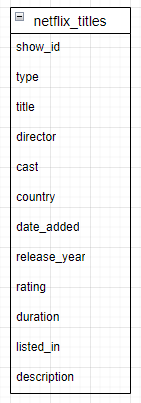  
normalized table (listed_in renamed to categories) (design in draw.io)  
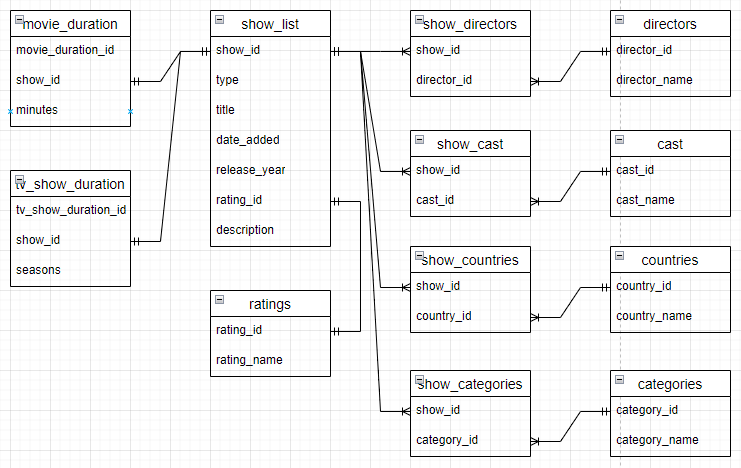  

## handle missing data

- replace missing data with "unknown"

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- director, cast, and country are missing a lot of data. replace with unknown instead
- but date_added, rating, and duration are only missing a few records. research online and replace with correct value

In [5]:
df["director"] = df["director"].str.strip()

In [6]:
df["director"] = df["director"].fillna("unknown")

In [7]:
df["cast"] = df["cast"].str.strip()

In [8]:
df["cast"] = df["cast"].fillna("unknown")

In [9]:
df["country"] = df["country"].str.strip()

In [10]:
df["country"] = df["country"].fillna("unknown")

In [11]:
df.query("date_added.isna()")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,unknown,Igor Dmitriev,unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [12]:
df.loc[6066, "date_added"] = "2014-09-15"
df.loc[6174, "date_added"] = "2013-06-01"
df.loc[6795, "date_added"] = "2016-04-06"
df.loc[6806, "date_added"] = "2015-01-01"
df.loc[6901, "date_added"] = "2016-01-04"
df.loc[7196, "date_added"] = "2017-07-06"
df.loc[7254, "date_added"] = "2015-06-01"
df.loc[7406, "date_added"] = "2017-01-13"
df.loc[7847, "date_added"] = "2014-09-15"
df.loc[8182, "date_added"] = "2014-09-15"

In [13]:
df["rating"] = df["rating"].str.strip()
df.query("rating.isna()")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,unknown,"Oprah Winfrey, Ava DuVernay",unknown,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [14]:
df.loc[5989, "rating"] = "PG-13"
df.loc[6827, "rating"] = "PG-13"
df.loc[7312, "rating"] = "TV-G"
df.loc[7537, "rating"] = "PG-13"

In [15]:
df.query("duration.isna()")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- these 3 records seem to have data entry errors. duration are replaced in rating column.
- fix duration and replace rating with proper rating value

In [16]:
df.loc[5541, "duration"] = "74 min"
df.loc[5794, "duration"] = "84 min"
df.loc[5813, "duration"] = "66 min"

In [17]:
df.loc[5541, "rating"] = "TV-MA" # Louis C.K. 2017
df.loc[5794, "rating"] = "TV-MA" # Louis C.K.: Hilarious (no info available online, might be unrated but is 16+ in netflix)
df.loc[5813, "rating"] = "TV-MA" # Louis C.K.: Live at the Comedy Store (no info available online, might be unrated but is 16+ in netflix)
# "16+" rated shows do not exist in the categories, but since those 3 are from the same actor and director and by checking the show online,
# i will deduce both as listed in TV-MA rating as well

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## data format standardization

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


tasks:
- remove 's' from show_id
- remove "min" and "seasons" from duration
- rename listed_in to category
- check unique values and ensure standardization: type, rating, show_id
- unpack director, cast, country, category
- parse date_added
- strip director, cast, country, category and check for long 

In [20]:
df["show_id"] = df["show_id"].str.strip('s')

In [21]:
df = df.astype({"show_id":"int64"})

In [22]:
print(df["show_id"].min())
print(df["show_id"].max())

1
8807


In [23]:
df = df.rename(columns={"listed_in":"category"})

In [24]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [25]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
df["director"] = df["director"].str.split(",")

In [27]:
df["cast"] = df["cast"].str.split(",")

In [28]:
df["category"] = df["category"].str.split(",")

In [29]:
df["country"] = df["country"].str.split(",")

In [30]:
print(df["release_year"].min())
print(df["release_year"].max())

1925
2021


In [31]:
df["duration"] = df["duration"].replace("[^0-9]", "", regex=True)

In [32]:
df["date_added"] = df["date_added"].apply(lambda x: parser.parse(x).strftime("%Y-%m-%d"))

## RDB normalization

- create tables in pd dataframe type
- create parent tables first that has no dependency / foreign key : directors, cast, ratings, categories, countries

In [33]:
ratings = pd.Series(df["rating"].unique())
ratings = pd.DataFrame({
    "rating_id" : range(len(ratings)) , 
    "rating_name" : ratings
})
ratings

,rating_id,rating_name
0,0,PG-13
1,1,TV-MA
2,2,PG
3,3,TV-14
4,4,TV-PG
5,5,TV-Y
6,6,TV-Y7
7,7,R
8,8,TV-G
9,9,G


In [34]:
directors = [director.strip() for record in df["director"] for director in record] # flatten list of directors in df with list comprehension
directors = pd.Series(directors) # turn into series type
directors = directors.unique() # get only the unique values

directors = pd.DataFrame({ # create directors table. (reused the variable name for better readability)
    "director_id" : range(len(directors)) ,
    "director_name" : directors
})
directors

,director_id,director_name
0,0,Kirsten Johnson
1,1,unknown
2,2,Julien Leclercq
3,3,Mike Flanagan
4,4,Robert Cullen
...,...,...
4989,4989,Mu Chu
4990,4990,Chandra Prakash Dwivedi
4991,4991,Majid Al Ansari
4992,4992,Peter Hewitt


In [35]:
casts = [cast.strip() for record in df["cast"] for cast in record] # flatten list of cast in df with list comprehension
casts = pd.Series(casts) # turn into series type
casts = casts.unique() # get only the unique values

casts = pd.DataFrame({ # create cast table. (reused the variable name for better readability)
    "cast_id" : range(len(casts)) ,
    "cast_name" : casts
})
casts

,cast_id,cast_name
0,0,unknown
1,1,Ama Qamata
2,2,Khosi Ngema
3,3,Gail Mabalane
4,4,Thabang Molaba
...,...,...
36435,36435,Ryan Newman
36436,36436,Raaghav Chanana
36437,36437,Malkeet Rauni
36438,36438,Anita Shabdish


In [36]:
countries = [country.strip() for record in df["country"] for country in record] # flatten list of country in df with list comprehension
countries = pd.Series(countries) # turn into series type
countries = countries.unique() # get only the unique values

countries = pd.DataFrame({ # create country table. (reused the variable name for better readability)
    "country_id" : range(len(countries)) ,
    "country_name" : countries
})
countries

,country_id,country_name
0,0,United States
1,1,South Africa
2,2,unknown
3,3,India
4,4,Ghana
...,...,...
119,119,Sudan
120,120,Panama
121,121,Uganda
122,122,East Germany


In [37]:
categories = [category.strip() for record in df["category"] for category in record] # flatten list of category in df with list comprehension
categories = pd.Series(categories) # turn into series type
categories = categories.unique() # get only the unique values

categories = pd.DataFrame({ # create category table. (reused the variable name for better readability)
    "category_id" : range(len(categories)) ,
    "category_name" : categories
})
categories

,category_id,category_name
0,0,Documentaries
1,1,International TV Shows
2,2,TV Dramas
3,3,TV Mysteries
4,4,Crime TV Shows
5,5,TV Action & Adventure
6,6,Docuseries
7,7,Reality TV
8,8,Romantic TV Shows
9,9,TV Comedies


- create parent tables that have only 1 foreign key dependency,
- which are from tables that are already created (show_list, movie_duration, tv_show_duration)

In [38]:
show_list = pd.DataFrame({
    "show_id" : df["show_id"] ,
    "type" : df["type"] , 
    "title" : df["title"] , 
    "date_added" : df["date_added"] , 
    "release_year" : df["release_year"] , 
    "rating_id" : df["rating"] , 
    "description" : df["description"]
})
show_list

,show_id,type,title,date_added,release_year,rating_id,description
0,1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,2021-09-24,2021,TV-MA,To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,2019-11-20,2007,R,"A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,2019-07-01,2018,TV-Y7,"While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,2019-11-01,2009,R,Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,2020-01-11,2006,PG,"Dragged from civilian life, a former superhero..."


- then replace the values of rating_id with actual rating_id from the ratings table according to the matching value

In [39]:
for record_index in show_list.index:
    rating_name = show_list.loc[record_index, "rating_id"]
    rating_id = ratings.query("rating_name == @rating_name")["rating_id"].iloc[0]
    show_list.loc[record_index, "rating_id"] = rating_id
show_list

,show_id,type,title,date_added,release_year,rating_id,description
0,1,Movie,Dick Johnson Is Dead,2021-09-25,2020,0,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,2021-09-24,2021,1,"After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,2021-09-24,2021,1,To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,2021-09-24,2021,1,"Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,2021-09-24,2021,1,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,2019-11-20,2007,7,"A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,2019-07-01,2018,6,"While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,2019-11-01,2009,7,Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,2020-01-11,2006,2,"Dragged from civilian life, a former superhero..."


In [40]:
movie_duration = pd.DataFrame({
    "movie_duration_id" : range(len(show_list.query("type == 'Movie'"))) ,
    "show_id" : df.query("type == 'Movie'")["show_id"],
    "minutes" : df.query("type == 'Movie'")["duration"]
})
movie_duration

,movie_duration_id,show_id,minutes
0,0,1,90
6,1,7,91
7,2,8,125
9,3,10,104
12,4,13,127
...,...,...,...
8801,6126,8802,96
8802,6127,8803,158
8804,6128,8805,88
8805,6129,8806,88


In [41]:
tv_show_duration = pd.DataFrame({
    "tv_show_duration_id" : range(len(show_list.query("type == 'TV Show'"))) ,
    "show_id" : df.query("type == 'TV Show'")["show_id"],
    "seasons" : df.query("type == 'TV Show'")["duration"]
})
tv_show_duration

,tv_show_duration_id,show_id,seasons
1,0,2,2
2,1,3,1
3,2,4,1
4,3,5,2
5,4,6,1
...,...,...,...
8795,2671,8796,2
8796,2672,8797,2
8797,2673,8798,3
8800,2674,8801,1


- create parent tables that have 2 foreign key dependencies,
- which are from tables that are already created (show_directors, show_cast, show_countries, show_categories)
- only tables left to create are the mapping tables

In [42]:
show_directors = pd.DataFrame({
    "show_id" : [] ,
    "director_id" : []
})
show_casts = pd.DataFrame({
    "show_id" : [] ,
    "cast_id" : []
})
show_categories = pd.DataFrame({
    "show_id" : [] ,
    "category_id" : []
})
show_countries = pd.DataFrame({
    "show_id" : [] ,
    "country_id" : []
})

In [43]:
for record_index in df.index:
    show_id = df.loc[record_index, "show_id"]
    for director in df.loc[record_index, "director"]:
        last_index = len(show_directors)
        director_id = directors.query("director_name == @director.strip()")["director_id"].iloc[0]
        
        show_directors.loc[last_index, "show_id"] = show_id
        show_directors.loc[last_index, "director_id"] = director_id

    for cast in df.loc[record_index, "cast"]:
        last_index = len(show_casts)
        cast_id = casts.query("cast_name == @cast.strip()")["cast_id"].iloc[0]
        
        show_casts.loc[last_index, "show_id"] = show_id
        show_casts.loc[last_index, "cast_id"] = cast_id

    for country in df.loc[record_index, "country"]:
        last_index = len(show_countries)
        country_id = countries.query("country_name == @country.strip()")["country_id"].iloc[0]
        
        show_countries.loc[last_index, "show_id"] = show_id
        show_countries.loc[last_index, "country_id"] = country_id
        
    for category in df.loc[record_index, "category"]:
        last_index = len(show_categories)
        category_id = categories.query("category_name == @category.strip()")["category_id"].iloc[0]
        
        show_categories.loc[last_index, "show_id"] = show_id
        show_categories.loc[last_index, "category_id"] = category_id

In [44]:
print(
    directors,
    casts,
    categories,
    countries,
    ratings,
    show_list,
    movie_duration,
    tv_show_duration,
    show_directors,
    show_casts,
)

      director_id            director_name
0               0          Kirsten Johnson
1               1                  unknown
2               2          Julien Leclercq
3               3            Mike Flanagan
4               4            Robert Cullen
...           ...                      ...
4989         4989                   Mu Chu
4990         4990  Chandra Prakash Dwivedi
4991         4991          Majid Al Ansari
4992         4992             Peter Hewitt
4993         4993              Mozez Singh

[4994 rows x 2 columns]        cast_id              cast_name
0            0                unknown
1            1             Ama Qamata
2            2            Khosi Ngema
3            3          Gail Mabalane
4            4         Thabang Molaba
...        ...                    ...
36435    36435            Ryan Newman
36436    36436        Raaghav Chanana
36437    36437          Malkeet Rauni
36438    36438         Anita Shabdish
36439    36439  Chittaranjan Tripathy

[3

- final checking of each table

In [45]:
print(directors.info())
print(directors["director_id"].min())
print(directors["director_id"].max())
print(directors["director_name"].min())
print(directors["director_name"].max())
print(directors["director_name"].str.len().max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director_id    4994 non-null   int64 
 1   director_name  4994 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None
0
4993
A. L. Vijay
Şenol Sönmez
32


In [46]:
directors.query("director_name.str.len() == 32")

,director_id,director_name
416,416,Florian Henckel von Donnersmarck


In [47]:
print(casts.info())
print(casts["cast_id"].min())
print(casts["cast_id"].max())
print(casts["cast_name"].min())
print(casts["cast_name"].max())
print(casts["cast_name"].str.len().max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36440 entries, 0 to 36439
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cast_id    36440 non-null  int64 
 1   cast_name  36440 non-null  object
dtypes: int64(1), object(1)
memory usage: 569.5+ KB
None
0
36439
"Riley" Lakdhar Dridi
Ṣọpẹ́ Dìrísù
100


In [48]:
casts.query("cast_name.str.len() == 100")

,cast_id,cast_name
5111,5111,"Cast members of the ""To All the Boys"" films di..."


In [49]:
show_casts.query("cast_id == 5111")

,show_id,cast_id
6174,733.0,5111.0


In [50]:
show_list.query("show_id == 733")

,show_id,type,title,date_added,release_year,rating_id,description
732,733,Movie,To All the Boys: Always and Forever - The Afte...,2021-06-12,2021,1,"Cast members of the ""To All the Boys"" films di..."


In [51]:
show_casts.query("show_id == 733")

,show_id,cast_id
6174,733.0,5111.0
6175,733.0,5112.0


- like in previous version of preprocessing the dataset, there is also an error on the cast name as the dataset came with error.
- the show is: To All the Boys: Always and Forever - The Afterparty
- replace the cast like before

In [52]:
casts = casts.query("cast_id != 5111") # remove error cast record
casts = casts.query("cast_id != 5112") # remove error cast record

In [53]:
show_casts = show_casts.query("cast_id != 5111") # remove error cast mapping record
show_casts = show_casts.query("cast_id != 5112") # remove error cast mapping record

- from online information: "To All the Boys: Always and Forever - The Afterparty" the cast are:
    - Anna Cathcart
    - Lana Condor
    - John Corbett
    - Henry Thomas
    - Noah Centineo
    - Sarayu Blue
    - Madeleine Arthur
    - Ross Butler
    - Emilija Baranac
    - Trezzo Mahoro
    - Kelcey Mawema
    - Sofia Black-D'Elia
    - Jeon Ho-Young
    - Janel Parrish
- check for existence of each in casts

In [54]:
print(casts.query("cast_name == 'Anna Cathcart'"))
print(casts.query("cast_name == 'Lana Condor'"))
print(casts.query("cast_name == 'John Corbett'"))
print(casts.query("cast_name == 'Henry Thomas'"))
print(casts.query("cast_name == 'Noah Centineo'"))
print(casts.query("cast_name == 'Sarayu Blue'"))
print(casts.query("cast_name == 'Madeleine Arthur'"))
print(casts.query("cast_name == 'Ross Butler'"))
print(casts.query("cast_name == 'Emilija Baranac'"))
print(casts.query("cast_name == 'Trezzo Mahoro'"))
print(casts.query("cast_name == 'Kelcey Mawema'"))
print(casts.query("cast_name == 'Sofia Black-D\\'Elia'"))
print(casts.query("cast_name == 'Jeon Ho-Young'"))
print(casts.query("cast_name == 'Janel Parrish'"))

      cast_id      cast_name
8572     8572  Anna Cathcart
      cast_id    cast_name
8570     8570  Lana Condor
      cast_id     cast_name
8578     8578  John Corbett
    cast_id     cast_name
40       40  Henry Thomas
      cast_id      cast_name
6483     6483  Noah Centineo
      cast_id    cast_name
8577     8577  Sarayu Blue
      cast_id         cast_name
8574     8574  Madeleine Arthur
      cast_id    cast_name
8573     8573  Ross Butler
      cast_id        cast_name
8575     8575  Emilija Baranac
      cast_id      cast_name
8576     8576  Trezzo Mahoro
      cast_id      cast_name
8579     8579  Kelcey Mawema
      cast_id           cast_name
8580     8580  Sofia Black-D'Elia
Empty DataFrame
Columns: [cast_id, cast_name]
Index: []
      cast_id      cast_name
8571     8571  Janel Parrish


- Jeon Ho-Young is not in the list. add.

In [55]:
new_record_index = casts.index.max() + 1
new_record_id = casts["cast_id"].max() + 1
casts.loc[new_record_index, "cast_id"] = new_record_id
casts.loc[new_record_index, "cast_name"] = "Jeon Ho-Young"
casts

,cast_id,cast_name
0,0.0,unknown
1,1.0,Ama Qamata
2,2.0,Khosi Ngema
3,3.0,Gail Mabalane
4,4.0,Thabang Molaba
...,...,...
36436,36436.0,Raaghav Chanana
36437,36437.0,Malkeet Rauni
36438,36438.0,Anita Shabdish
36439,36439.0,Chittaranjan Tripathy


In [56]:
casts_to_map = ["Anna Cathcart", "Lana Condor", "John Corbett", "Henry Thomas", "Noah Centineo", "Sarayu Blue", "Madeleine Arthur", "Ross Butler", "Emilija Baranac", "Trezzo Mahoro", "Kelcey Mawema", "Sofia Black-D'Elia", "Jeon Ho-Young", "Janel Parrish"]
for cast in casts_to_map:
    new_record_index = show_casts.index.max() + 1
    show_casts.loc[new_record_index, "show_id"] = 733 # the show_id queried above
    cast_id = casts.query("cast_name == @cast")["cast_id"].iloc[0]
    show_casts.loc[new_record_index, "cast_id"] = cast_id
show_casts

,show_id,cast_id
0,1.0,0.0
1,2.0,1.0
2,2.0,2.0
3,2.0,3.0
4,2.0,4.0
...,...,...
64960,733.0,8576.0
64961,733.0,8579.0
64962,733.0,8580.0
64963,733.0,36440.0


In [57]:
print(casts.info())
print(casts["cast_id"].min())
print(casts["cast_id"].max())
print(casts["cast_name"].min())
print(casts["cast_name"].max())
print(casts["cast_name"].str.len().max())

<class 'pandas.core.frame.DataFrame'>
Index: 36439 entries, 0 to 36440
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cast_id    36439 non-null  float64
 1   cast_name  36439 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.8+ MB
None
0.0
36440.0
"Riley" Lakdhar Dridi
Ṣọpẹ́ Dìrísù
84


In [58]:
casts.query("cast_name.str.len() == 84")

,cast_id,cast_name
28830,28830.0,this documentary follows the plight of 18 Belu...


In [59]:
show_casts.query("cast_id == 28830")

,show_id,cast_id
47249,6364.0,28830.0


In [60]:
show_casts.query("show_id == 6364")

,show_id,cast_id
47248,6364.0,28829.0
47249,6364.0,28830.0


In [61]:
show_list.query("show_id == 6364")

,show_id,type,title,date_added,release_year,rating_id,description
6363,6364,Movie,Born to Be Free,2017-04-01,2016,3,Casting a light on the mistreatment of sea mam...


In [62]:
show_casts = show_casts.query("show_id != 6364")

In [63]:
casts = casts.query("cast_id != 28829 and cast_id != 28830")

- info from online: Manos Krystalis, Kelly Bronzy

In [64]:
casts.query("cast_name == 'Manos Krystalis' or cast_name == 'Kelly Bronzy'")

,cast_id,cast_name


- they are not currently existing in casts

In [65]:
cast_to_add = ["Manos Krystalis", "Kelly Bronzy"]
for cast in cast_to_add:
    new_cast_id = casts["cast_id"].max() + 1
    new_cast_index = casts.index.max() + 1
    casts.loc[new_cast_index, "cast_id"] = new_cast_id
    casts.loc[new_cast_index, "cast_name"] = cast
casts

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_13248\4156394423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casts.loc[new_cast_index, "cast_id"] = new_cast_id


,cast_id,cast_name
0,0.0,unknown
1,1.0,Ama Qamata
2,2.0,Khosi Ngema
3,3.0,Gail Mabalane
4,4.0,Thabang Molaba
...,...,...
36438,36438.0,Anita Shabdish
36439,36439.0,Chittaranjan Tripathy
36440,36440.0,Jeon Ho-Young
36441,36441.0,Manos Krystalis


In [66]:
for cast in cast_to_add:
    new_record_index = show_casts.index.max() + 1
    cast_id = casts.query("cast_name == @cast")["cast_id"].iloc[0]
    show_casts.loc[new_record_index, "show_id"] = 6364
    show_casts.loc[new_record_index, "cast_id"] = cast_id
show_casts

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_13248\1196832293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_casts.loc[new_record_index, "show_id"] = 6364


,show_id,cast_id
0,1.0,0.0
1,2.0,1.0
2,2.0,2.0
3,2.0,3.0
4,2.0,4.0
...,...,...
64962,733.0,8580.0
64963,733.0,36440.0
64964,733.0,8571.0
64965,6364.0,36441.0


In [67]:
casts

,cast_id,cast_name
0,0.0,unknown
1,1.0,Ama Qamata
2,2.0,Khosi Ngema
3,3.0,Gail Mabalane
4,4.0,Thabang Molaba
...,...,...
36438,36438.0,Anita Shabdish
36439,36439.0,Chittaranjan Tripathy
36440,36440.0,Jeon Ho-Young
36441,36441.0,Manos Krystalis


In [68]:
print(casts.info())
print(casts["cast_id"].min())
print(casts["cast_id"].max())
print(casts["cast_name"].min())
print(casts["cast_name"].max())
print(casts["cast_name"].str.len().max())

<class 'pandas.core.frame.DataFrame'>
Index: 36439 entries, 0 to 36442
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cast_id    36439 non-null  float64
 1   cast_name  36439 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.8+ MB
None
0.0
36442.0
"Riley" Lakdhar Dridi
Ṣọpẹ́ Dìrísù
36


In [69]:
casts.query("cast_name.str.len() == 36")

,cast_id,cast_name
24214,24214.0,Craig Robinson & The Nasty Delicious


In [70]:
show_casts.query("cast_id == 24214")

,show_id,cast_id
37474,4939.0,24214.0


In [71]:
show_list.query("show_id == 4939")

,show_id,type,title,date_added,release_year,rating_id,description
4938,4939,Movie,Seth Rogen's Hilarity for Charity,2018-04-06,2018,1,"Seth Rogen and friends combine stand-up, sketc..."


In [72]:
show_casts.query("show_id == 4939")

,show_id,cast_id
37463,4939.0,1353.0
37464,4939.0,240.0
37465,4939.0,24211.0
37466,4939.0,4220.0
37467,4939.0,24212.0
37468,4939.0,7630.0
37469,4939.0,24213.0
37470,4939.0,8393.0
37471,4939.0,10130.0
37472,4939.0,9540.0


In [73]:
id_of_cast_names_to_check = show_casts.query("show_id == 4939")["cast_id"].values
for id in id_of_cast_names_to_check:
    print(casts.query("cast_id == @id")["cast_name"])

1353    Seth Rogen
Name: cast_name, dtype: object
240    Ike Barinholtz
Name: cast_name, dtype: object
24211    Michael Che
Name: cast_name, dtype: object
4220    Sacha Baron Cohen
Name: cast_name, dtype: object
24212    Jeff Goldblum
Name: cast_name, dtype: object
7630    Tiffany Haddish
Name: cast_name, dtype: object
24213    Chris Hardwick
Name: cast_name, dtype: object
8393    Nick Kroll
Name: cast_name, dtype: object
10130    John Mulaney
Name: cast_name, dtype: object
9540    Kumail Nanjiani
Name: cast_name, dtype: object
9070    Chelsea Peretti
Name: cast_name, dtype: object
24214    Craig Robinson & The Nasty Delicious
Name: cast_name, dtype: object
24215    Lauren Miller Rogen
Name: cast_name, dtype: object
24216    Justin Roiland
Name: cast_name, dtype: object
1302    Sarah Silverman
Name: cast_name, dtype: object
17600    Michelle Wolf
Name: cast_name, dtype: object


- researching online, "Craig Robinson & The Nasty Delicious" is actually in the cast list.

In [74]:
print(casts.info())
print(casts["cast_id"].min())
print(casts["cast_id"].max())
print(casts["cast_name"].min())
print(casts["cast_name"].max())
print(casts["cast_name"].str.len().max())

<class 'pandas.core.frame.DataFrame'>
Index: 36439 entries, 0 to 36442
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cast_id    36439 non-null  float64
 1   cast_name  36439 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.8+ MB
None
0.0
36442.0
"Riley" Lakdhar Dridi
Ṣọpẹ́ Dìrísù
36


In [75]:
casts.query("cast_name.str.len() > 25").values

array([[90.0, 'Suthipongse Thatphithakkul'],
       [516.0, 'Remilekun "Reminisce" Safaru'],
       [517.0, 'Tobechukwu "iLLbliss" Ejiofor'],
       [634.0, 'Alba Gaïa Kraghede Bellugi'],
       [1487.0, 'Charles  "Charly Boy" Oputa'],
       [1681.0, 'Kathrine Thorborg Johansen'],
       [2053.0, 'Phanuroj Chalermkijporntavee'],
       [2403.0, 'LaTanya Richardson Jackson'],
       [2834.0, 'Dominique Provost-Chalkley'],
       [3307.0, 'Sebastian Jakob Doppelbauer'],
       [3477.0, 'Cecilia de los Santos Vargas'],
       [4654.0, 'Nawarat Techarathanaprasert'],
       [4657.0, "Marvin 'Krondon' Jones III"],
       [4809.0, 'Lapassalal Jiravechsoontornkul'],
       [5067.0, 'Annabelle Westenholz-Smith'],
       [5219.0, 'José Alfredo González Dzul'],
       [5220.0, 'Eliseo Mancilla De La Cruz'],
       [5806.0, 'Nuttanicha Dungwattanawanich'],
       [6203.0, 'Khali Daniya-Renee Spraggins'],
       [6614.0, 'William Christopher Stephens'],
       [7210.0, 'Nannaphas Loetnamchoetsaku

In [76]:
print(countries.info())
print(countries["country_id"].min())
print(countries["country_id"].max())
print(countries["country_name"].min())
print(countries["country_name"].max())
print(countries["country_name"].str.len().max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_id    124 non-null    int64 
 1   country_name  124 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB
None
0
123

unknown
20


In [77]:
countries.values

array([[0, 'United States'],
       [1, 'South Africa'],
       [2, 'unknown'],
       [3, 'India'],
       [4, 'Ghana'],
       [5, 'Burkina Faso'],
       [6, 'United Kingdom'],
       [7, 'Germany'],
       [8, 'Ethiopia'],
       [9, 'Czech Republic'],
       [10, 'Mexico'],
       [11, 'Turkey'],
       [12, 'Australia'],
       [13, 'France'],
       [14, 'Finland'],
       [15, 'China'],
       [16, 'Canada'],
       [17, 'Japan'],
       [18, 'Nigeria'],
       [19, 'Spain'],
       [20, 'Belgium'],
       [21, 'South Korea'],
       [22, 'Singapore'],
       [23, 'Italy'],
       [24, 'Romania'],
       [25, 'Argentina'],
       [26, 'Venezuela'],
       [27, 'Hong Kong'],
       [28, 'Russia'],
       [29, ''],
       [30, 'Ireland'],
       [31, 'Nepal'],
       [32, 'New Zealand'],
       [33, 'Brazil'],
       [34, 'Greece'],
       [35, 'Jordan'],
       [36, 'Colombia'],
       [37, 'Switzerland'],
       [38, 'Israel'],
       [39, 'Taiwan'],
       [40, 'Bulgaria'],
  

- there is an entry in countries with empty string '' as its country name.
- remove entry and replace record that are mapped to it to the "unknown" country_id (2) in show_countries mapping table

In [78]:
countries = countries.query("country_id != 29")

In [79]:
show_countries.query("country_id == 29")

,show_id,country_id
241,194.0,29.0
447,366.0,29.0
1458,1193.0,29.0
2714,2225.0,29.0
5556,4654.0,29.0
7068,5926.0,29.0
8470,7008.0,29.0


In [80]:
empty_strings_indices = show_countries.query("country_id == 29").index
for index in empty_strings_indices:
    show_countries.loc[index, "country_id"] = 2

In [81]:
show_countries.query("country_id == 29")

,show_id,country_id


In [82]:
print(categories.info())
print(categories["category_id"].min())
print(categories["category_id"].max())
print(categories["category_name"].min())
print(categories["category_name"].max())
print(categories["category_name"].str.len().max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    42 non-null     int64 
 1   category_name  42 non-null     object
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes
None
0
41
Action & Adventure
Thrillers
28


In [83]:
print(show_list.info())
print(show_list["show_id"].min())
print(show_list["show_id"].max())
print(show_list["title"].min())
print(show_list["title"].max())
print(show_list["title"].str.len().max())
print(show_list["description"].str.len().max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   int64 
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   date_added    8807 non-null   object
 4   release_year  8807 non-null   int64 
 5   rating_id     8807 non-null   object
 6   description   8807 non-null   object
dtypes: int64(2), object(5)
memory usage: 481.8+ KB
None
1
8807
#Alive
최강전사 미니특공대 : 영웅의 탄생
104
248


In [84]:
show_list["title"].str.len().max()

104

In [85]:
show_list.query("title.str.len() == 104")

,show_id,type,title,date_added,release_year,rating_id,description
5164,5165,Movie,Jim & Andy: The Great Beyond - Featuring a Ver...,2017-11-17,2017,1,Through the lens of his stunningly immersive p...


In [86]:
show_list.loc[5164, "title"]

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

In [87]:
show_list.query("description.str.len() > 200")

,show_id,type,title,date_added,release_year,rating_id,description
215,216,Movie,Shootout at Lokhandwala,2021-08-27,2007,1,"Based on a true story, this action film follow..."
593,594,Movie,Snow Day,2021-07-01,2000,2,"When a snow day shuts down the whole town, the..."
1519,1520,Movie,Mukhsin,2020-12-18,2006,4,"When young Mukhsin arrives in a new town, 10-y..."
2845,2846,Movie,The Death of Mr. Lazarescu,2020-03-04,2005,7,The plot of Romanian director Cristi Puiu's re...
3700,3701,TV Show,Scare Tactics,2019-06-30,2011,1,This ghoulish but hilarious hidden-camera show...
4792,4793,Movie,Chalte Chalte,2018-07-01,2003,3,Priya and Raj are polar opposites. Raj is bras...
4797,4798,Movie,Namastey London,2018-07-01,2007,3,"To her Indian parents' dismay, London-born Jas..."
4948,4949,Movie,Billu,2018-04-01,2009,4,An Indian village is abuzz with news that a ma...
4952,4953,Movie,Main Hoon Na,2018-04-01,2004,3,Major Ram Prasad Sharma yearns to see project ...
5292,5293,Movie,Berserk: The Golden Age Arc II - The Battle fo...,2017-09-01,2012,1,"For three years, Guts believed his mission was..."


In [89]:
print(
    directors,
    casts,
    categories,
    countries,
    ratings,
    show_list,
    movie_duration,
    tv_show_duration,
    show_directors,
    show_casts,
    show_categories,
    show_countries
)

      director_id            director_name
0               0          Kirsten Johnson
1               1                  unknown
2               2          Julien Leclercq
3               3            Mike Flanagan
4               4            Robert Cullen
...           ...                      ...
4989         4989                   Mu Chu
4990         4990  Chandra Prakash Dwivedi
4991         4991          Majid Al Ansari
4992         4992             Peter Hewitt
4993         4993              Mozez Singh

[4994 rows x 2 columns]        cast_id              cast_name
0          0.0                unknown
1          1.0             Ama Qamata
2          2.0            Khosi Ngema
3          3.0          Gail Mabalane
4          4.0         Thabang Molaba
...        ...                    ...
36438  36438.0         Anita Shabdish
36439  36439.0  Chittaranjan Tripathy
36440  36440.0          Jeon Ho-Young
36441  36441.0        Manos Krystalis
36442  36442.0           Kelly Bronzy

[3

In [92]:
directors.to_csv("tables/directors.csv", index=False)
casts.to_csv("tables/casts.csv", index=False)
categories.to_csv("tables/categories.csv", index=False)
countries.to_csv("tables/countries.csv", index=False)
ratings.to_csv("tables/ratings.csv", index=False)
show_list.to_csv("tables/show_list.csv", index=False)
movie_duration.to_csv("tables/movie_duration.csv", index=False)
tv_show_duration.to_csv("tables/tv_show_duration.csv", index=False)
show_directors.to_csv("tables/show_directors.csv", index=False)
show_casts.to_csv("tables/show_casts.csv", index=False)
show_categories.to_csv("tables/show_categories.csv", index=False)
show_countries.to_csv("tables/show_countries.csv", index=False)

- saved into csv files so that i wont need to rerun the entire program when i close the notebook. the normalizations take long

## database loading

### database connection

In [3]:
directors = pd.read_csv("tables/directors.csv")
casts = pd.read_csv("tables/casts.csv")
categories = pd.read_csv("tables/categories.csv")
countries = pd.read_csv("tables/countries.csv")
ratings = pd.read_csv("tables/ratings.csv")
show_list = pd.read_csv("tables/show_list.csv")
movie_duration = pd.read_csv("tables/movie_duration.csv")
tv_show_duration = pd.read_csv("tables/tv_show_duration.csv")
show_directors = pd.read_csv("tables/show_directors.csv")
show_casts = pd.read_csv("tables/show_casts.csv")
show_categories = pd.read_csv("tables/show_categories.csv")
show_countries = pd.read_csv("tables/show_countries.csv")

In [2]:
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3280"
)
cursor = db.cursor()

In [3]:
query = "SHOW DATABASES;"
cursor.execute(query)
cursor.fetchall()

[('airbnb',),
 ('bodyfat',),
 ('fitness_tracker',),
 ('information_schema',),
 ('mysql',),
 ('netflix',),
 ('netflix2',),
 ('northwind',),
 ('performance_schema',),
 ('sys',),
 ('w3schools',)]

In [7]:
query = "CREATE DATABASE IF NOT EXISTS netflix2"
cursor.execute(query)
cursor.fetchall()

[]

In [4]:
query = "USE netflix2"
cursor.execute(query)
cursor.fetchall()

[]

### table creations

In [13]:
query = (
    "CREATE TABLE IF NOT EXISTS directors (" +
    "director_id INTEGER NOT NULL, " +
    "director_name VARCHAR(64) NOT NULL, " +
    "PRIMARY KEY(director_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [14]:
query = (
    "CREATE TABLE IF NOT EXISTS casts (" +
    "cast_id INTEGER NOT NULL, " +
    "cast_name VARCHAR(64) NOT NULL, " +
    "PRIMARY KEY(cast_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [15]:
query = (
    "CREATE TABLE IF NOT EXISTS ratings (" +
    "rating_id INTEGER NOT NULL, " +
    "rating_name VARCHAR(64) NOT NULL, " +
    "PRIMARY KEY(rating_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [16]:
query = (
    "CREATE TABLE IF NOT EXISTS categories (" +
    "category_id INTEGER NOT NULL, " +
    "category_name VARCHAR(64) NOT NULL, " +
    "PRIMARY KEY(category_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [17]:
query = (
    "CREATE TABLE IF NOT EXISTS countries (" +
    "country_id INTEGER NOT NULL, " +
    "country_name VARCHAR(64) NOT NULL, " +
    "PRIMARY KEY(country_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [19]:
query = (
    "CREATE TABLE IF NOT EXISTS shows (" +
    "show_id INTEGER NOT NULL, " +
    "type ENUM('Movie', 'TV Show') NOT NULL, " +
    "title VARCHAR(512) NOT NULL, " +
    "date_added DATE NOT NULL, " +
    "release_year YEAR NOT NULL, " + 
    "rating_id INTEGER NOT NULL, " +
    "description VARCHAR(1024) NOT NULL, " +
    "PRIMARY KEY(show_id), " +
    "FOREIGN KEY(rating_id) REFERENCES ratings(rating_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [20]:
query = (
    "CREATE TABLE IF NOT EXISTS movie_duration (" +
    "movie_duration_id INTEGER NOT NULL, " +
    "show_id INTEGER NOT NULL, " +
    "minutes FLOAT NOT NULL, " +
    "PRIMARY KEY(movie_duration_id, show_id), " +
    "FOREIGN KEY(show_id) REFERENCES shows(show_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [21]:
query = (
    "CREATE TABLE IF NOT EXISTS tv_show_duration (" +
    "tv_show_duration_id INTEGER NOT NULL, " +
    "show_id INTEGER NOT NULL, " +
    "seasons INTEGER NOT NULL, " +
    "PRIMARY KEY(tv_show_duration_id, show_id), " +
    "FOREIGN KEY(show_id) REFERENCES shows(show_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [23]:
query = (
    "CREATE TABLE IF NOT EXISTS show_directors (" +
    "show_id INTEGER NOT NULL, " +
    "director_id INTEGER NOT NULL, " +
    "PRIMARY KEY(show_id, director_id), " +
    "FOREIGN KEY(show_id) REFERENCES shows(show_id), " +
    "FOREIGN KEY(director_id) REFERENCES directors(director_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [24]:
query = (
    "CREATE TABLE IF NOT EXISTS show_casts (" +
    "show_id INTEGER NOT NULL, " +
    "cast_id INTEGER NOT NULL, " +
    "PRIMARY KEY(show_id, cast_id), " +
    "FOREIGN KEY(show_id) REFERENCES shows(show_id), " +
    "FOREIGN KEY(cast_id) REFERENCES casts(cast_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [25]:
query = (
    "CREATE TABLE IF NOT EXISTS show_countries (" +
    "show_id INTEGER NOT NULL, " +
    "country_id INTEGER NOT NULL, " +
    "PRIMARY KEY(show_id, country_id), " +
    "FOREIGN KEY(show_id) REFERENCES shows(show_id), " +
    "FOREIGN KEY(country_id) REFERENCES countries(country_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [26]:
query = (
    "CREATE TABLE IF NOT EXISTS show_categories (" +
    "show_id INTEGER NOT NULL, " +
    "category_id INTEGER NOT NULL, " +
    "PRIMARY KEY(show_id, category_id), " +
    "FOREIGN KEY(show_id) REFERENCES shows(show_id), " +
    "FOREIGN KEY(category_id) REFERENCES categories(category_id)" +
    ")"
)
cursor.execute(query)
cursor.fetchall()

[]

In [27]:
query = "SHOW TABLES"
cursor.execute(query)
cursor.fetchall()

[('casts',),
 ('categories',),
 ('countries',),
 ('directors',),
 ('movie_duration',),
 ('ratings',),
 ('show_casts',),
 ('show_categories',),
 ('show_countries',),
 ('show_directors',),
 ('shows',),
 ('tv_show_duration',)]

### data loading

In [23]:
print(directors.columns)
query = "DESCRIBE directors"
cursor.execute(query)
cursor.fetchall()

Index(['director_id', 'director_name'], dtype='object')


[('director_id', 'int', 'NO', 'PRI', None, ''),
 ('director_name', 'varchar(64)', 'NO', '', None, '')]

In [24]:
query = "INSERT INTO directors VALUES (%s, %s)"
values = directors.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [25]:
print(casts.columns)
query = "DESCRIBE casts"
cursor.execute(query)
cursor.fetchall()

Index(['cast_id', 'cast_name'], dtype='object')


[('cast_id', 'int', 'NO', 'PRI', None, ''),
 ('cast_name', 'varchar(64)', 'NO', '', None, '')]

In [27]:
query = "INSERT INTO casts VALUES (%s, %s)"
values = casts.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [28]:
print(categories.columns)
query = "DESCRIBE categories"
cursor.execute(query)
cursor.fetchall()

Index(['category_id', 'category_name'], dtype='object')


[('category_id', 'int', 'NO', 'PRI', None, ''),
 ('category_name', 'varchar(64)', 'NO', '', None, '')]

In [29]:
query = "INSERT INTO categories VALUES (%s, %s)"
values = categories.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [30]:
print(countries.columns)
query = "DESCRIBE countries"
cursor.execute(query)
cursor.fetchall()

Index(['country_id', 'country_name'], dtype='object')


[('country_id', 'int', 'NO', 'PRI', None, ''),
 ('country_name', 'varchar(64)', 'NO', '', None, '')]

In [31]:
query = "INSERT INTO countries VALUES (%s, %s)"
values = countries.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [32]:
print(ratings.columns)
query = "DESCRIBE ratings"
cursor.execute(query)
cursor.fetchall()

Index(['rating_id', 'rating_name'], dtype='object')


[('rating_id', 'int', 'NO', 'PRI', None, ''),
 ('rating_name', 'varchar(64)', 'NO', '', None, '')]

In [33]:
query = "INSERT INTO ratings VALUES (%s, %s)"
values = ratings.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [35]:
print(show_list.columns)
query = "DESCRIBE shows"
cursor.execute(query)
cursor.fetchall()

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating_id',
       'description'],
      dtype='object')


[('show_id', 'int', 'NO', 'PRI', None, ''),
 ('type', "enum('Movie','TV Show')", 'NO', '', None, ''),
 ('title', 'varchar(512)', 'NO', '', None, ''),
 ('date_added', 'date', 'NO', '', None, ''),
 ('release_year', 'year', 'NO', '', None, ''),
 ('rating_id', 'int', 'NO', 'MUL', None, ''),
 ('description', 'varchar(1024)', 'NO', '', None, '')]

In [36]:
query = "INSERT INTO shows VALUES (%s, %s, %s, %s, %s, %s, %s)"
values = show_list.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [37]:
print(movie_duration.columns)
query = "DESCRIBE movie_duration"
cursor.execute(query)
cursor.fetchall()

Index(['movie_duration_id', 'show_id', 'minutes'], dtype='object')


[('movie_duration_id', 'int', 'NO', 'PRI', None, ''),
 ('show_id', 'int', 'NO', 'PRI', None, ''),
 ('minutes', 'float', 'NO', '', None, '')]

In [38]:
query = "INSERT INTO movie_duration VALUES (%s, %s, %s)"
values = movie_duration.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [39]:
print(tv_show_duration.columns)
query = "DESCRIBE tv_show_duration"
cursor.execute(query)
cursor.fetchall()

Index(['tv_show_duration_id', 'show_id', 'seasons'], dtype='object')


[('tv_show_duration_id', 'int', 'NO', 'PRI', None, ''),
 ('show_id', 'int', 'NO', 'PRI', None, ''),
 ('seasons', 'int', 'NO', '', None, '')]

In [40]:
query = "INSERT INTO tv_show_duration VALUES (%s, %s, %s)"
values = tv_show_duration.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [41]:
print(show_directors.columns)
query = "DESCRIBE show_directors"
cursor.execute(query)
cursor.fetchall()

Index(['show_id', 'director_id'], dtype='object')


[('show_id', 'int', 'NO', 'PRI', None, ''),
 ('director_id', 'int', 'NO', 'PRI', None, '')]

In [43]:
# query = "INSERT INTO show_directors VALUES (%s, %s)"
# values = show_directors.values.tolist()
# cursor.executemany(query, values)
# cursor.fetchall()
# returned IntegrityError: 1062 (23000): Duplicate entry '3719-2207' for key 'show_directors.PRIMARY'

In [49]:
show_directors.query("show_id == 3719")

,show_id,director_id
4023,3719.0,2207.0
4024,3719.0,2207.0


In [52]:
print(show_directors.shape)
show_directors.drop_duplicates().shape

(9612, 2)


(9611, 2)

In [53]:
show_directors = show_directors.drop_duplicates()

In [54]:
query = "INSERT INTO show_directors VALUES (%s, %s)"
values = show_directors.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [55]:
print(show_casts.columns)
query = "DESCRIBE show_casts"
cursor.execute(query)
cursor.fetchall()

Index(['show_id', 'cast_id'], dtype='object')


[('show_id', 'int', 'NO', 'PRI', None, ''),
 ('cast_id', 'int', 'NO', 'PRI', None, '')]

In [57]:
# query = "INSERT INTO show_casts VALUES (%s, %s)"
# values = show_casts.values.tolist()
# cursor.executemany(query, values)
# cursor.fetchall()
# IntegrityError: 1062 (23000): Duplicate entry '1632-8113' for key 'show_casts.PRIMARY'

In [59]:
show_casts.query("show_id == 1632 and cast_id == 8113")

,show_id,cast_id
13213,1632.0,8113.0
13214,1632.0,8113.0


In [64]:
print(show_casts.shape)
print(show_casts.drop_duplicates().shape)

(64963, 2)
(64961, 2)


- there are more duplicates. investigate.

In [69]:
show_casts.query("@show_casts.duplicated() == True")

,show_id,cast_id
13214,1632.0,8113.0
44571,6014.0,27532.0


In [72]:
show_casts.query("(show_id == 1632 and cast_id == 8113) or (show_id == 6014 and cast_id == 27532)")

,show_id,cast_id
13213,1632.0,8113.0
13214,1632.0,8113.0
44570,6014.0,27532.0
44571,6014.0,27532.0


In [73]:
show_casts = show_casts.drop_duplicates()

In [74]:
query = "INSERT INTO show_casts VALUES (%s, %s)"
values = show_casts.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [75]:
print(show_categories.columns)
query = "DESCRIBE show_categories"
cursor.execute(query)
cursor.fetchall()

Index(['show_id', 'category_id'], dtype='object')


[('show_id', 'int', 'NO', 'PRI', None, ''),
 ('category_id', 'int', 'NO', 'PRI', None, '')]

In [76]:
query = "INSERT INTO show_categories VALUES (%s, %s)"
values = show_categories.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [77]:
print(show_countries.columns)
query = "DESCRIBE show_countries"
cursor.execute(query)
cursor.fetchall()

Index(['show_id', 'country_id'], dtype='object')


[('show_id', 'int', 'NO', 'PRI', None, ''),
 ('country_id', 'int', 'NO', 'PRI', None, '')]

In [78]:
query = "INSERT INTO show_countries VALUES (%s, %s)"
values = show_countries.values.tolist()
cursor.executemany(query, values)
cursor.fetchall()

[]

In [79]:
db.commit()